# [MCB 32]: Lab 06 - Frog Heart Study

---

### Professor Robin Ball 
Using what you learned, you will create tables for the data you collected in this lab as well as the averaged class data. You will also graph the class data, so it is easier to visualize and find major trends. 

*Estimated Time: ~60 Minutes*

---

### Table of Contents
1. [Creating a Bar Graph](#section_1)

2. [Data Analysis](#section_2)

    a. [Entering your data](#section_2a)
    
    b. [Calculating class data](#section_2b)
    
    c. [Graphing class data](#section_2c)


In [ ]:
!pip install datascience numpy matplotlib

In [8]:
%matplotlib inline

from datascience import *
import numpy as np
import matplotlib.pyplot as plt

---

# 1. Creating a Bar Graph

You will learn how to create bar graphs to help you vizualize the data. We will draw bar graphs with horizontal bars because it’s easier to label the bars that way. Let's start by creating a random table called groceries.

In [22]:
item_name = ["Apples", "Bananas", "Carrots"]
quantities = [5, 7, 2]
prices = [0.20, 0.25, 0.75]
weights = [0.33, 0.25, 0.16]

In [33]:
groceries = Table().with_columns(
            "Item Name", item_name, 
            "Quantity", quantities, 
            "Price", prices,
            "Weight", weights)
groceries

Item Name,Quantity,Price,Weight
Apples,5,0.2,0.33
Bananas,7,0.25,0.25
Carrots,2,0.75,0.16


In this section, we will draw a graph of the distribution of quantities in the column `Quantity` and weights in `Weight` from the `groceries` table.
 - `select` is a handy method that creates a table with only the desired columns.
 
We don't want the column `Price`, so we only select `Item Name`, `Quantity`, and `Weight`.

In [31]:
groceries.select("Item Name", "Quantity", "Weight")

Item Name,Quantity,Weight
Apples,5,0.33
Bananas,7,0.25
Carrots,2,0.16


To create the bar graph, we will use `barh`.

 - `barh` generates a bar graph of the values in a column. The argument is the column label of the categories. You can create a bar graph using `'TABLE'.barh('COLUMN_LABEL')`.
 
Let's plot the new `groceries` table, using `Item Name` as the column label.

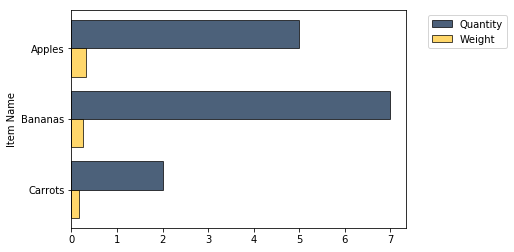

In [35]:
groceries.select("Item Name", "Quantity", "Weight").barh("Item Name")

# 2. Data Analysis

You will use what you learned last week to create tables for this lab. If you need a refresher, you can always refer back to the previous lab notebooks.

### 2a. Entering your data

<div class="alert alert-block alert-info">
<b>QUESTION</b> Create tables for Table 1, 2, and 3 that contain the data you collected. For the sake of efficiency, "HR" refers to the heart rate and "amp" refers to the amplitude of the R wave. The labels (column names) of each table have been saved for you in lists, so you can see where to enter and save your table data.
</div>

#### Table 1: Temperature Effects

In [9]:
t1_labels = ["Human heart rate", "Baseline frog heart rate", "Warm temperature", 
          "Baseline before cold", "Cold temperature"]

In [ ]:
### Create Table 1
t1_HR = ...
t1_amp = ...
t1 = ...
t1

#### Table 2: Neurotransmitter Effects

In [ ]:
t2_labels = ["Baseline (before epinephrine)", "+ epinephrine", "After wash out (new baseline)", "+ acetylcholine"]

In [ ]:
### Create Table 2
t2_HR = ...
t2_amp = ...
t2 = ...
t2

#### Table 3: Effects of Electrolytes

In [ ]:
t3_labels = ["Baseline (before KCl)", "+ KCl", "Baseline (before CaCl2)", "+ CaCl2"]

In [ ]:
### Create Table 3
t3_HR = ...
t3_amp = ...
t3 = ...
t3

### Accessing an Element in a List

So far, lists have been helpful when it comes to creating tables, but what if you want to access only the first element in the list? Here's how:

In [3]:
example_list = [1, 2, 3, 4, 5]
example_list[0]

1

Using square brackets `[ ]` allows you to grab a specific element. In Python, lists start at 0, rather than 1. This is why `example_list[0]` gives you the first element, `1`.

#### Table 4: Change from Baseline
Using the data from Tables 1, 2, and 3, create Table 4 to show the change in heart rate and R wave amplitude from the baseline. `t1_HR[2]` gives you the heart rate at warm temperature in Table 1, and `t1_HR[1]` gives you the baseline frog heart rate in Table 1. To find the change in heart rate between warm temperature and baseline, you subtract `t1_HR[2] - t1_HR[1]`. The first few have been done for you.

In [2]:
t4_labels = ["Warm temperature", "Cold Temperature", "Epinephrine", "Acetylcholine", "KCl", "CaCl2"]

In [ ]:
### Create Table 4
t4_HR = [t1_HR[2] - t1_HR[1], t1_HR[4] - t1_HR[3], t2_HR[...] - t2_HR[...], 
         ..., ..., ...]
t4_amp = [t1_amp[2] - t1_amp[1], t1_amp[4] - t1_amp[3], t2_amp[...] - t2_amp[...], 
          ..., ..., ...]
t4 = ...
t4

<div class="alert alert-block alert-info">
<b>QUESTION</b> Make sure to input the data from Table 4 into the shared spreadsheet.
</div>

### 2b. Calculating class data

<div class="alert alert-block alert-info">
<b>QUESTION</b> Using the class data, calculate the average and standard deviation for the heart rate and R wave amplitude. Put the values in a list.
</div>

In [ ]:
avg_HR = ...
avg_amp = ...
std_dev_HR = ...
std_dev_amp = ...

### 2c. Graphing class data

<div class="alert alert-block alert-info">
<b>QUESTION</b> First create a table that includes the averaged heart rate, R wave amplitude, standard deviation for heart rate, and standard deviation for amplitude. Then, use the table to create a bar graph of the average data for heart rate and the standard deviation for the heart rate.
</div>

#### Table 5: Class Average

In [ ]:
avg_labels = ["Warm temperature", "Cold Temperature", "Epinephrine", "Acetylcholine", "KCl", "CaCl2"]

In [ ]:
avg = 
avg

#### Graph 1: Change in Heart Rate and Standard Deviation Error (from Class Data)

In [ ]:
...

---

### Saving the Notebook as a PDF

Congrats on finishing your third lab notebook! To turn in this lab assignment follow the steps below:

>1. Press `Control + P` (or `Command + P` on Mac) to open the Print preview
2. Change the destination so that it saves locally on your own computer.
2. Save as PDF.
3. If you are stuck, follow further instructions [here](https://www.wikihow.com/Save-a-Web-Page-as-a-PDF-in-Google-Chrome).

Your lab instructor will explain to you what to do afterwards.

---

#### References

 - UC Berkeley Foundations of Data Science (Data 8) Textbook: https://www.inferentialthinking.com/chapters/intro
 


 
---

Notebook developed by: Samantha Yuhan
    
Data Science Modules: http://data.berkeley.edu/education/modules